In [37]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import shap
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(20, 16))
plt.rc("font", size=10)

In [38]:
df_root = pd.read_csv('C:\\Repo_Pessoal\\Short-Term-Load-Forecasting\\PJME_hourly.csv')
df_root.columns = ['ds', 'y']
df_root['ds'] = pd.to_datetime(df_root['ds'])

# df_root.insert(0, 'unique_id', 'PJM_Load_hourly')
# df_root = df_root.sort_values(['unique_id', 'ds']).reset_index(drop=True)
df_root.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [39]:
def lags(df:pd.DataFrame,y: str,lag: int) -> pd.DataFrame:
    for num in range(1,lag+1):
        df[f'lag{num}'] = df[y].shift(num)
    return df

In [40]:
df = lags(df_root,'y',1)
df = df[1:]
df.set_index('ds',inplace=True)

In [41]:
train_size = int(len(df.y)*2/3)
train_set = df[:train_size]
test_set = df[train_size:]

X_train = train_set.drop(columns=['y'])
y_train = train_set.y

X_test = test_set.drop(columns=['y'])
y_test = test_set.y

In [47]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X_train,y_train)

score = model.score(X_train,y_train)
print("Training score: ", score)

predicted = model.predict(X_test)
test_set['y_hat'] = predicted

Training score:  0.9423387755858316



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


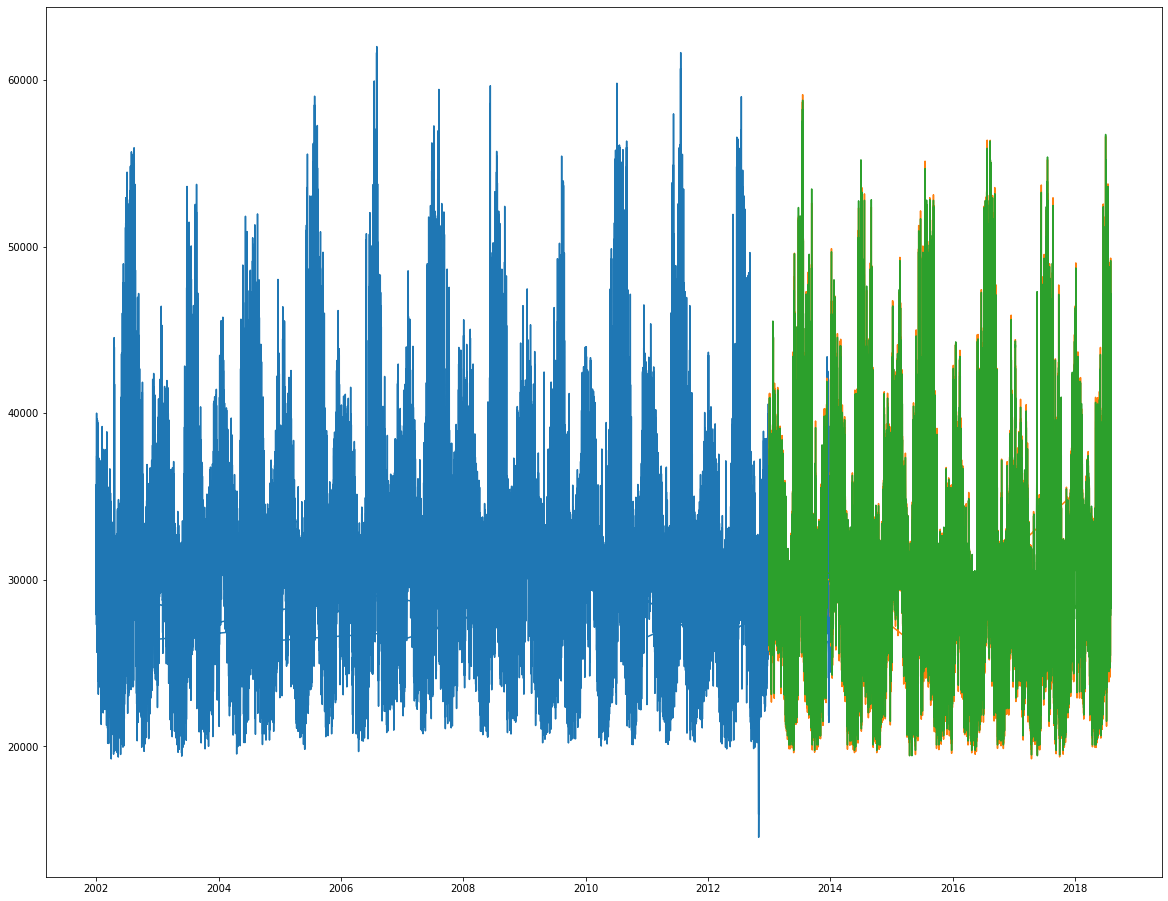

In [51]:
plt.figure()
plt.plot(train_set.y)
plt.plot(test_set.y)
plt.plot(test_set.y_hat)

In [8]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer(X_test)

100%|===================| 48382/48447 [06:35<00:00]        

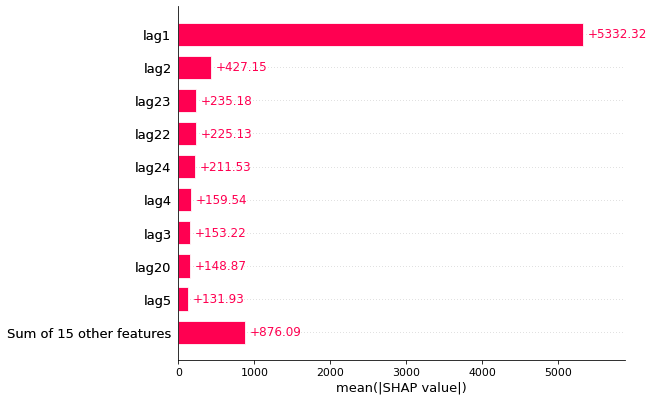

In [53]:
shap.plots.bar(shap_values,max_display=10)

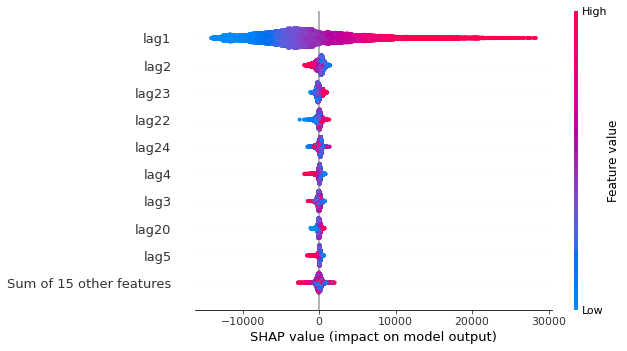

In [57]:
shap.plots.beeswarm(shap_values,max_display=10)

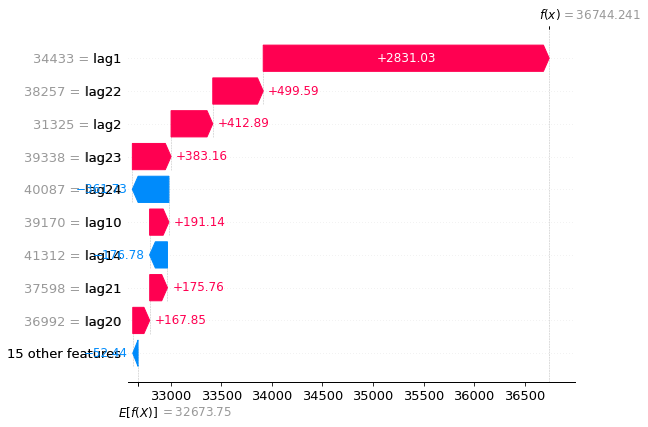

In [11]:
shap.plots.waterfall(shap_values[1])